👋 Hello and welcome to this exciting mini-project on Car Price Prediction!

In this project, we explore a real-world dataset and guide you through the complete Machine Learning workflow — from initial data exploration to building and refining predictive models.

We kick things off with Exploratory Data Analysis (EDA) to uncover how various factors like engine size, horsepower, and mileage influence car prices. Next, we move on to data preprocessing, where we clean and prepare the dataset for modeling.

Our first approach uses Multiple Linear Regression to predict car prices. But we didn’t stop there! To capture more complex, non-linear relationships in the data, we implemented Polynomial Regression, which led to better performance and improved prediction accuracy.

This project is powered by the Car Price dataset and built entirely in Python, using popular libraries such as pandas, matplotlib, seaborn, and scikit-learn.

We hope you enjoy this journey into the world of machine learning and car price prediction! 🚗📈✨

In [221]:
#Import the required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Read the data using pandas


In [225]:
#Load the dataset
data=pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\CarPrice_Assignment.csv")
#View top 5 rows of a dataset
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [227]:
#No of rows in a dataset
print(data.shape[0])
#No of columns in a dataset
print(data.shape[1])

205
26


In [229]:
#Checking that is there any null values in each column in the dataset
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Exploratory Data Analysis(EDA)

In [234]:
data_EDA=data.copy()
data_EDA.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

Text(0.5, 1.0, 'Distribution of car prices by Fuel type ')

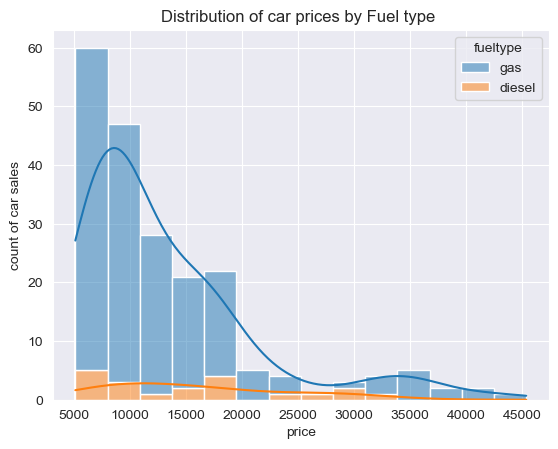

In [236]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='fueltype',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by Fuel type ")

The plot shows the distribution of car prices,seperated by fueltype(gas,diesel).
More number of cars are sold at cheaper prices.
count of car sales are decreased when cars are sold at higher prices.
Count of car sales are increased when cars are sold at lower prices.

Text(0.5, 1.0, 'Distribution of car prices by aspiration')

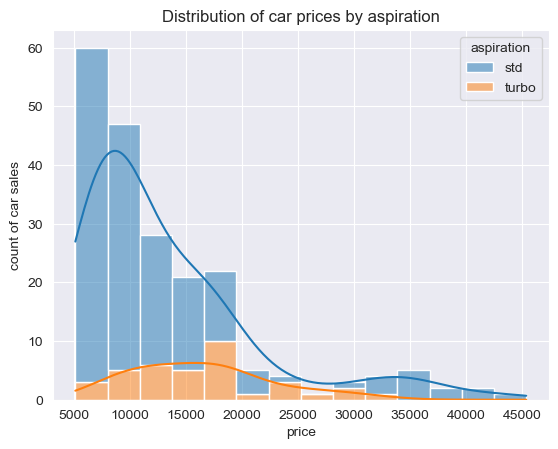

In [239]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='aspiration',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by aspiration")

The plot shows the distribution of car prices,seperated by aspiration(std,turbo).
The blue color indicates std and orange color indicates turbo.
Most of the std cars are sold at lower prices.
After 35,000 there are no turbo cars are sold.

Text(0.5, 1.0, 'Distribution of car prices by carbody')

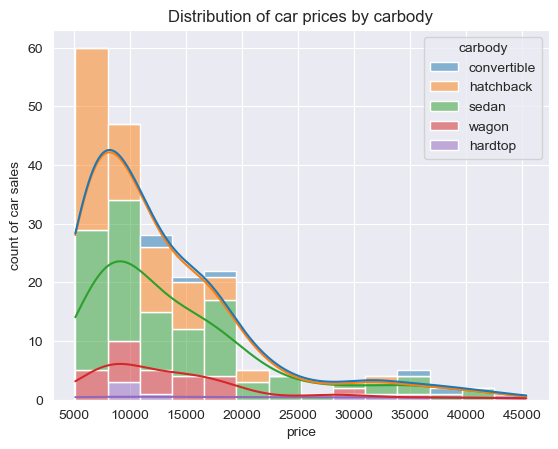

In [242]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='carbody',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by carbody")

The plot shows the distribution of car prices,grouped by carbody type(convertible,hatchback,sedan,wagon,hardtop).
Most sedans are mid priced and widely sold.
hatchbacks are mostly lower priced and quite common.
convertible and wagons are less common and show more variation in pricing.


Text(0.5, 1.0, 'Distribution of car prices by drivewheel')

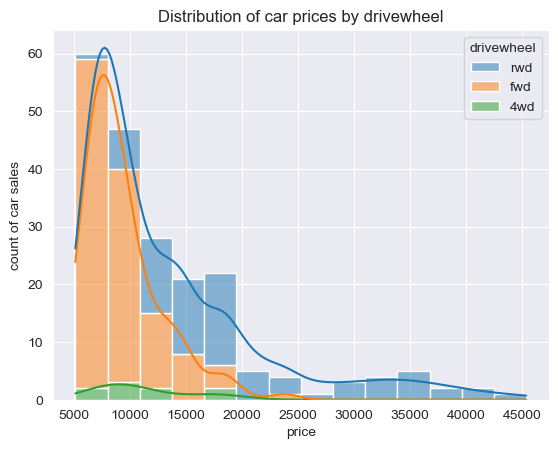

In [245]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='drivewheel',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by drivewheel")

The plot shows the distribution of car prices,grouped by the drivewheel type(rear-wheel drive,front-wheel drive,4-wheel drive).
Front-wheel drive cars has a high concentration of car sales in the lower price range.
Rear-wheel drive cars are less common than fwd but more frequent than 4wd.rwd cars are also sold at higher prices.
4-wheel drive cars are least common type.They are sold at lower prices.
    



Text(0.5, 1.0, 'Distribution of car prices by enginelocation')

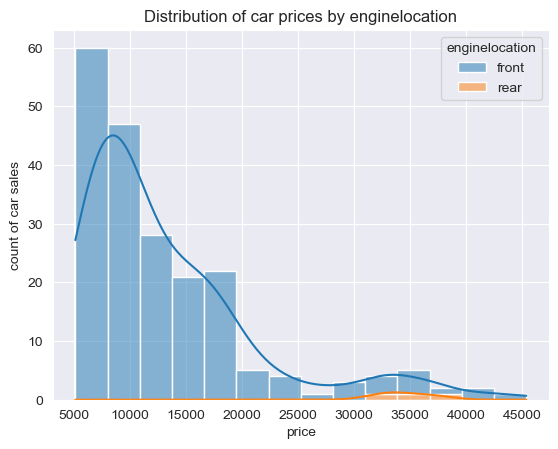

In [248]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='enginelocation',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by enginelocation")

The plot shows the distribution of car prices,seperated by engineloaction(front-engine,rear-engine).
Front-engine cars(blue cars) are much more common.Most of them are cheaper.
Rear-engine cars(orange cars) are very rare.They are more expensive but not many are sold.


Text(0.5, 1.0, 'Distribution of car prices by enginetype')

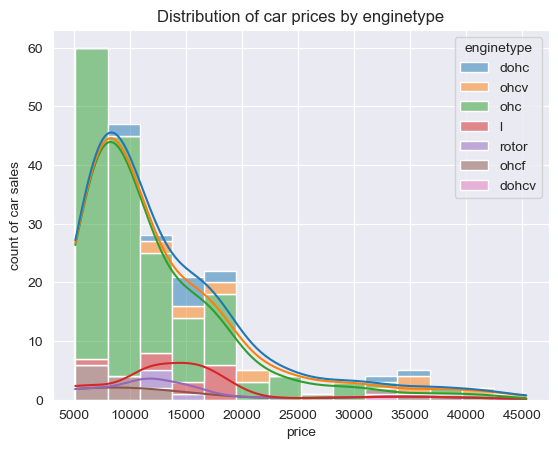

In [251]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='enginetype',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by enginetype")

The plot shows the distribution of car prices,grouped by the enginetype(dohc,ohcv,ohc,etc.).
OHC engines(green bars) are the most common.These cars are usually cheaper.
OHCV and DOHC engines(orange and blue bars) are less common,but they appear more often in the higher price range.
Other engine types like rotor,I,ohcf,and dochv are rare scattered across various price points.



Text(0.5, 1.0, 'Distribution of car prices by fuelsystem')

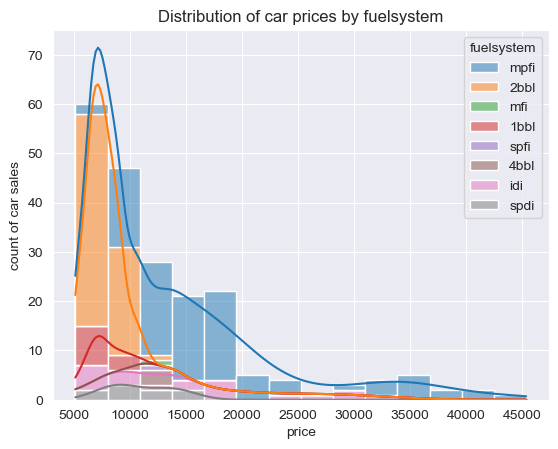

In [254]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='fuelsystem',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by fuelsystem")

The plot shows the distribution of car prices,grouped by the fuelsystem type(MPFI,2BBL,MFI,1BBL,etc.).
MPFI(Multi-point Fuel injection)is the most common fuel system.It has the highest count of cars,especially in the Lower mid-price range.
2BBL and 1BBL(types of carburetors) are less common.They are mostly found in lower-priced cars.

Text(0.5, 1.0, 'Distribution of car prices by cyindernumber')

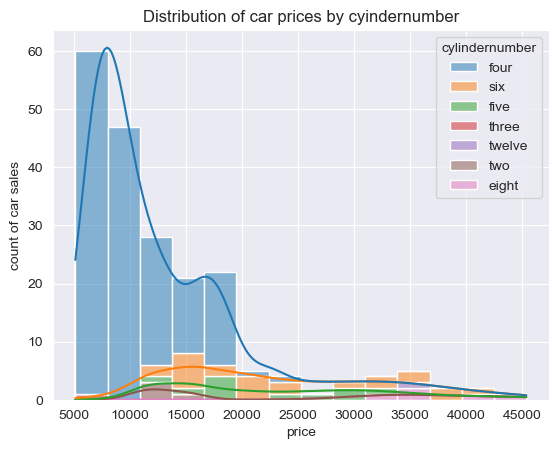

In [257]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='cylindernumber',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by cyindernumber")

The plot shows the distribution of car prices,grouped by number of cylinders(eg.4,6,5,3,8 cylinders,etc.).
The blue area and line represent cars with 4 cylinders.These dominate the graph,especially in the lower to mid-price range.
cars with 5,6,and 8 cylinders(green,orange,pink) appear less frequently.They are mostly found in the higher price ranges.
cars with 2,3,and 12 cylinders(light brown,red,purple) are very rare in the dataset.

Text(0.5, 1.0, 'Distribution of car prices by doorrnumber')

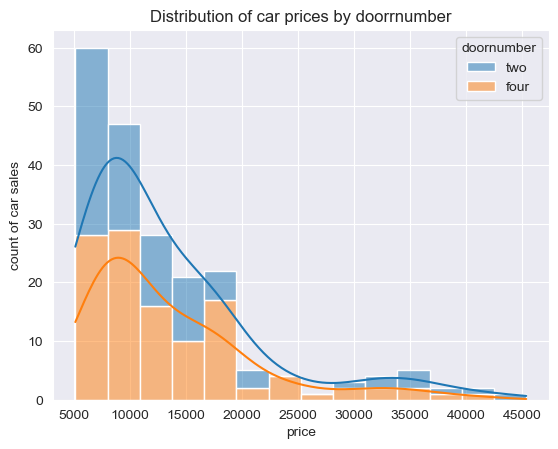

In [260]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='doornumber',multiple='stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("Distribution of car prices by doorrnumber")

The plot shows the distribution of car prices,seperated by doornumber(2-door,4-door).
2-door cars indicates blue color.Most of the sales are in the lower price range.
4-door cars indicates orange color.The distribution is more spread out,covering a border range of prices. 

<Axes: xlabel='price'>

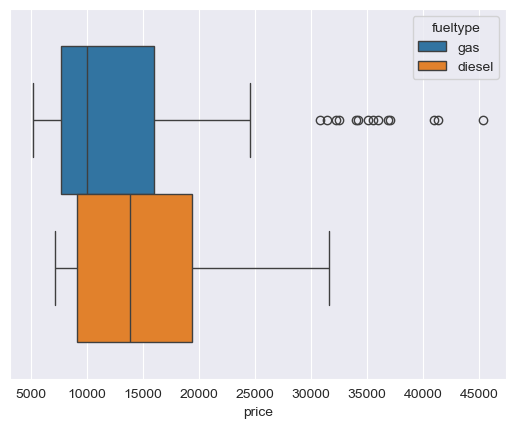

In [263]:
#boxplot()
sns.boxplot(data=data_EDA,x='price',hue='fueltype')

The following boxplot is plotted between car price and fueltype. From the graph, there are two types of fuel. Blue color indicates gas and orange color indicates diesel. This graph is used to describe the accuracy of the fueltype. More outliers return less accuracy, and fewer outliers return more accuracy. Here, diesel has more accuracy compared to the gas. Because gas has more outliers, where diesel has no outlier.

<Axes: xlabel='price'>

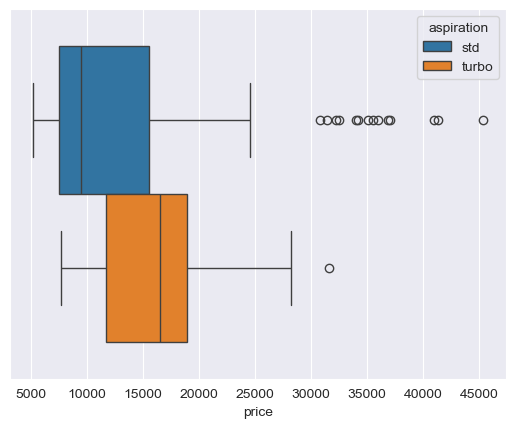

In [266]:
sns.boxplot(data=data_EDA,x='price',hue='aspiration')

The following boxplot is plotted between car price and aspiration. From the graph, there are two aspirations. Blue color indicates std and orange color indicates turbo. This graph is used to describe the accuracy of the aspiration. More outliers return less accuracy, and fewer outliers return more accuracy. Here, turbo has more accuracy compared to the standard. Because std has more outliers, where Turbo has only one outlier.

# Convert the categorical columns in to int by using Label Encoding

In [270]:
#convert cat into int
from sklearn.preprocessing import LabelEncoder
lab_obj = LabelEncoder()

data["fueltype"] = lab_obj.fit_transform(data["fueltype"])
data["aspiration"] = lab_obj.fit_transform(data["aspiration"])
data["doornumber"] = lab_obj.fit_transform(data["doornumber"])
data["carbody"] = lab_obj.fit_transform(data["carbody"])
data["drivewheel"] = lab_obj.fit_transform(data["drivewheel"])
data["enginelocation"] = lab_obj.fit_transform(data["enginelocation"])
data["enginetype"] = lab_obj.fit_transform(data["enginetype"])
data["cylindernumber"] = lab_obj.fit_transform(data["cylindernumber"])
data["fuelsystem"] = lab_obj.fit_transform(data["fuelsystem"])

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [274]:
data.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           0   
1       2          3       alfa-romero stelvio         1           0   
2       3          1  alfa-romero Quadrifoglio         1           0   
3       4          2               audi 100 ls         1           0   
4       5          2                audi 100ls         1           0   

   doornumber  carbody  drivewheel  enginelocation  wheelbase  ...  \
0           1        0           2               0       88.6  ...   
1           1        0           2               0       88.6  ...   
2           1        2           2               0       94.5  ...   
3           0        3           1               0       99.8  ...   
4           0        3           0               0       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0         130           5       3.47    2.68               9.0         111   
1         130           5       3.47    2.68               9.0         111   
2         152           5       2.68    3.47               9.0         154   
3         109           5       3.19    3.40              10.0         102   
4         136           5       3.19    3.40               8.0         115   

   peakrpm  citympg  highwaympg    price  
0     5000       21          27  13495.0  
1     5000       21          27  16500.0  
2     5000       19          26  16500.0  
3     5500       24          30  13950.0  
4     5500       18          22  17450.0  

[5 rows x 26 columns]

In [276]:
#Drop unwanted columns 
data = data.drop("car_ID",axis=1)
data = data.drop("CarName",axis=1)
data.head()

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0               0       88.6      168.8      64.1  ...         130   
1               0       88.6      168.8      64.1  ...         130   
2               0       94.5      171.2      65.5  ...         152   
3               0       99.8      176.6      66.2  ...         109   
4               0       99.4      176.6      66.4  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0  

[5 rows x 24 columns]

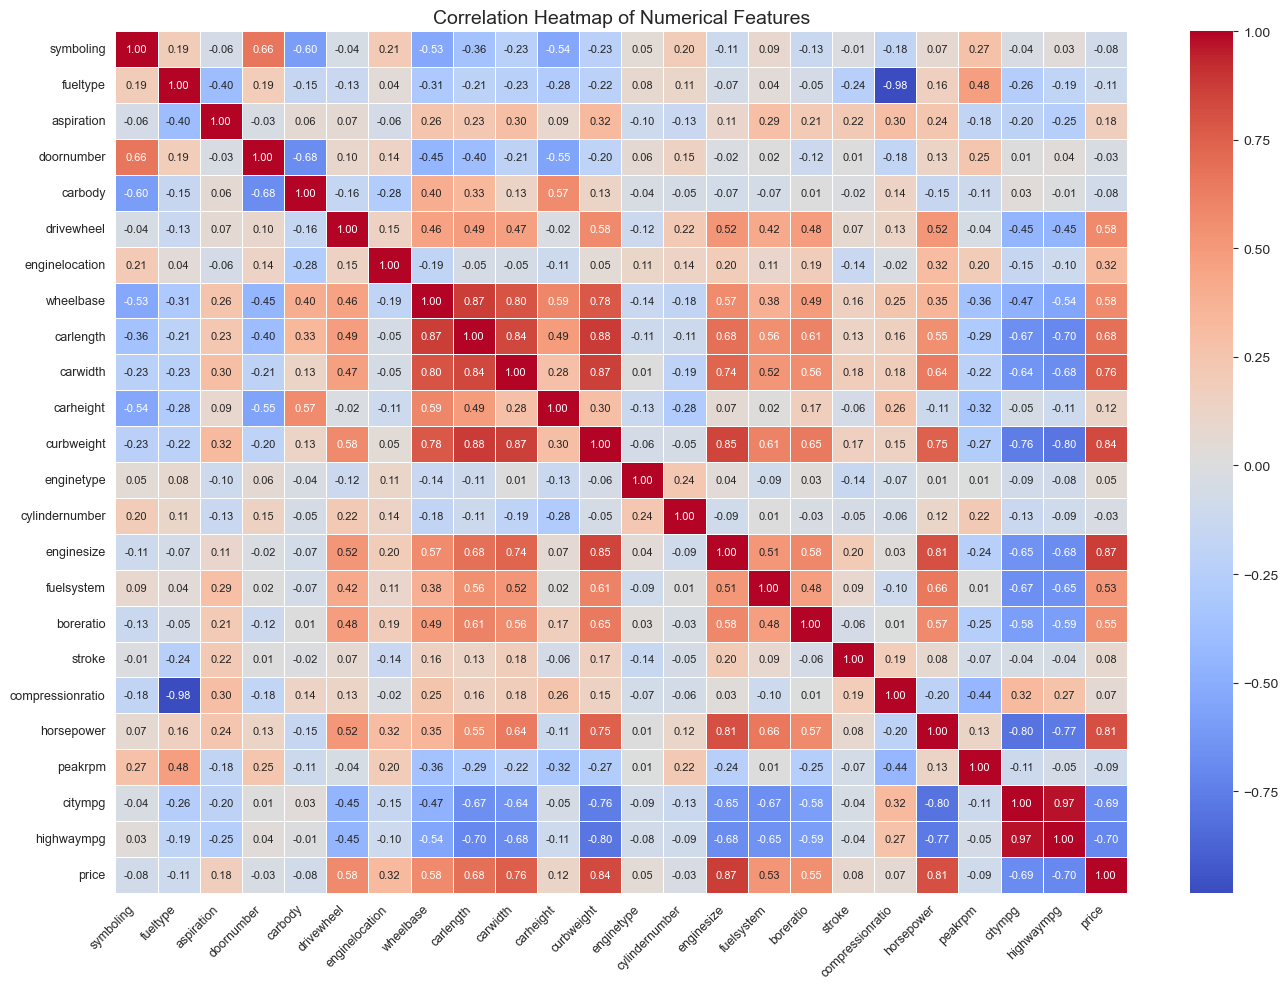

In [278]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10)) 

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show correlation numbers
    fmt=".2f",               # Format as decimal
    cmap="coolwarm",         # Color map
    linewidths=0.5,          # Line between boxes
    annot_kws={"size": 8}    # Smaller font size inside boxes
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

Price has strong positive correlations with features like engine size, horsepower, curb weight, and car width.
This indicates that larger, heavier, and more powerful cars tend to be more expensive.
These features are good predictors of car price.

Price has strong negative correlations with city MPG and highway MPG.
This means that more fuel-efficient cars are generally cheaper.
Fuel efficiency is inversely related to car power and size.

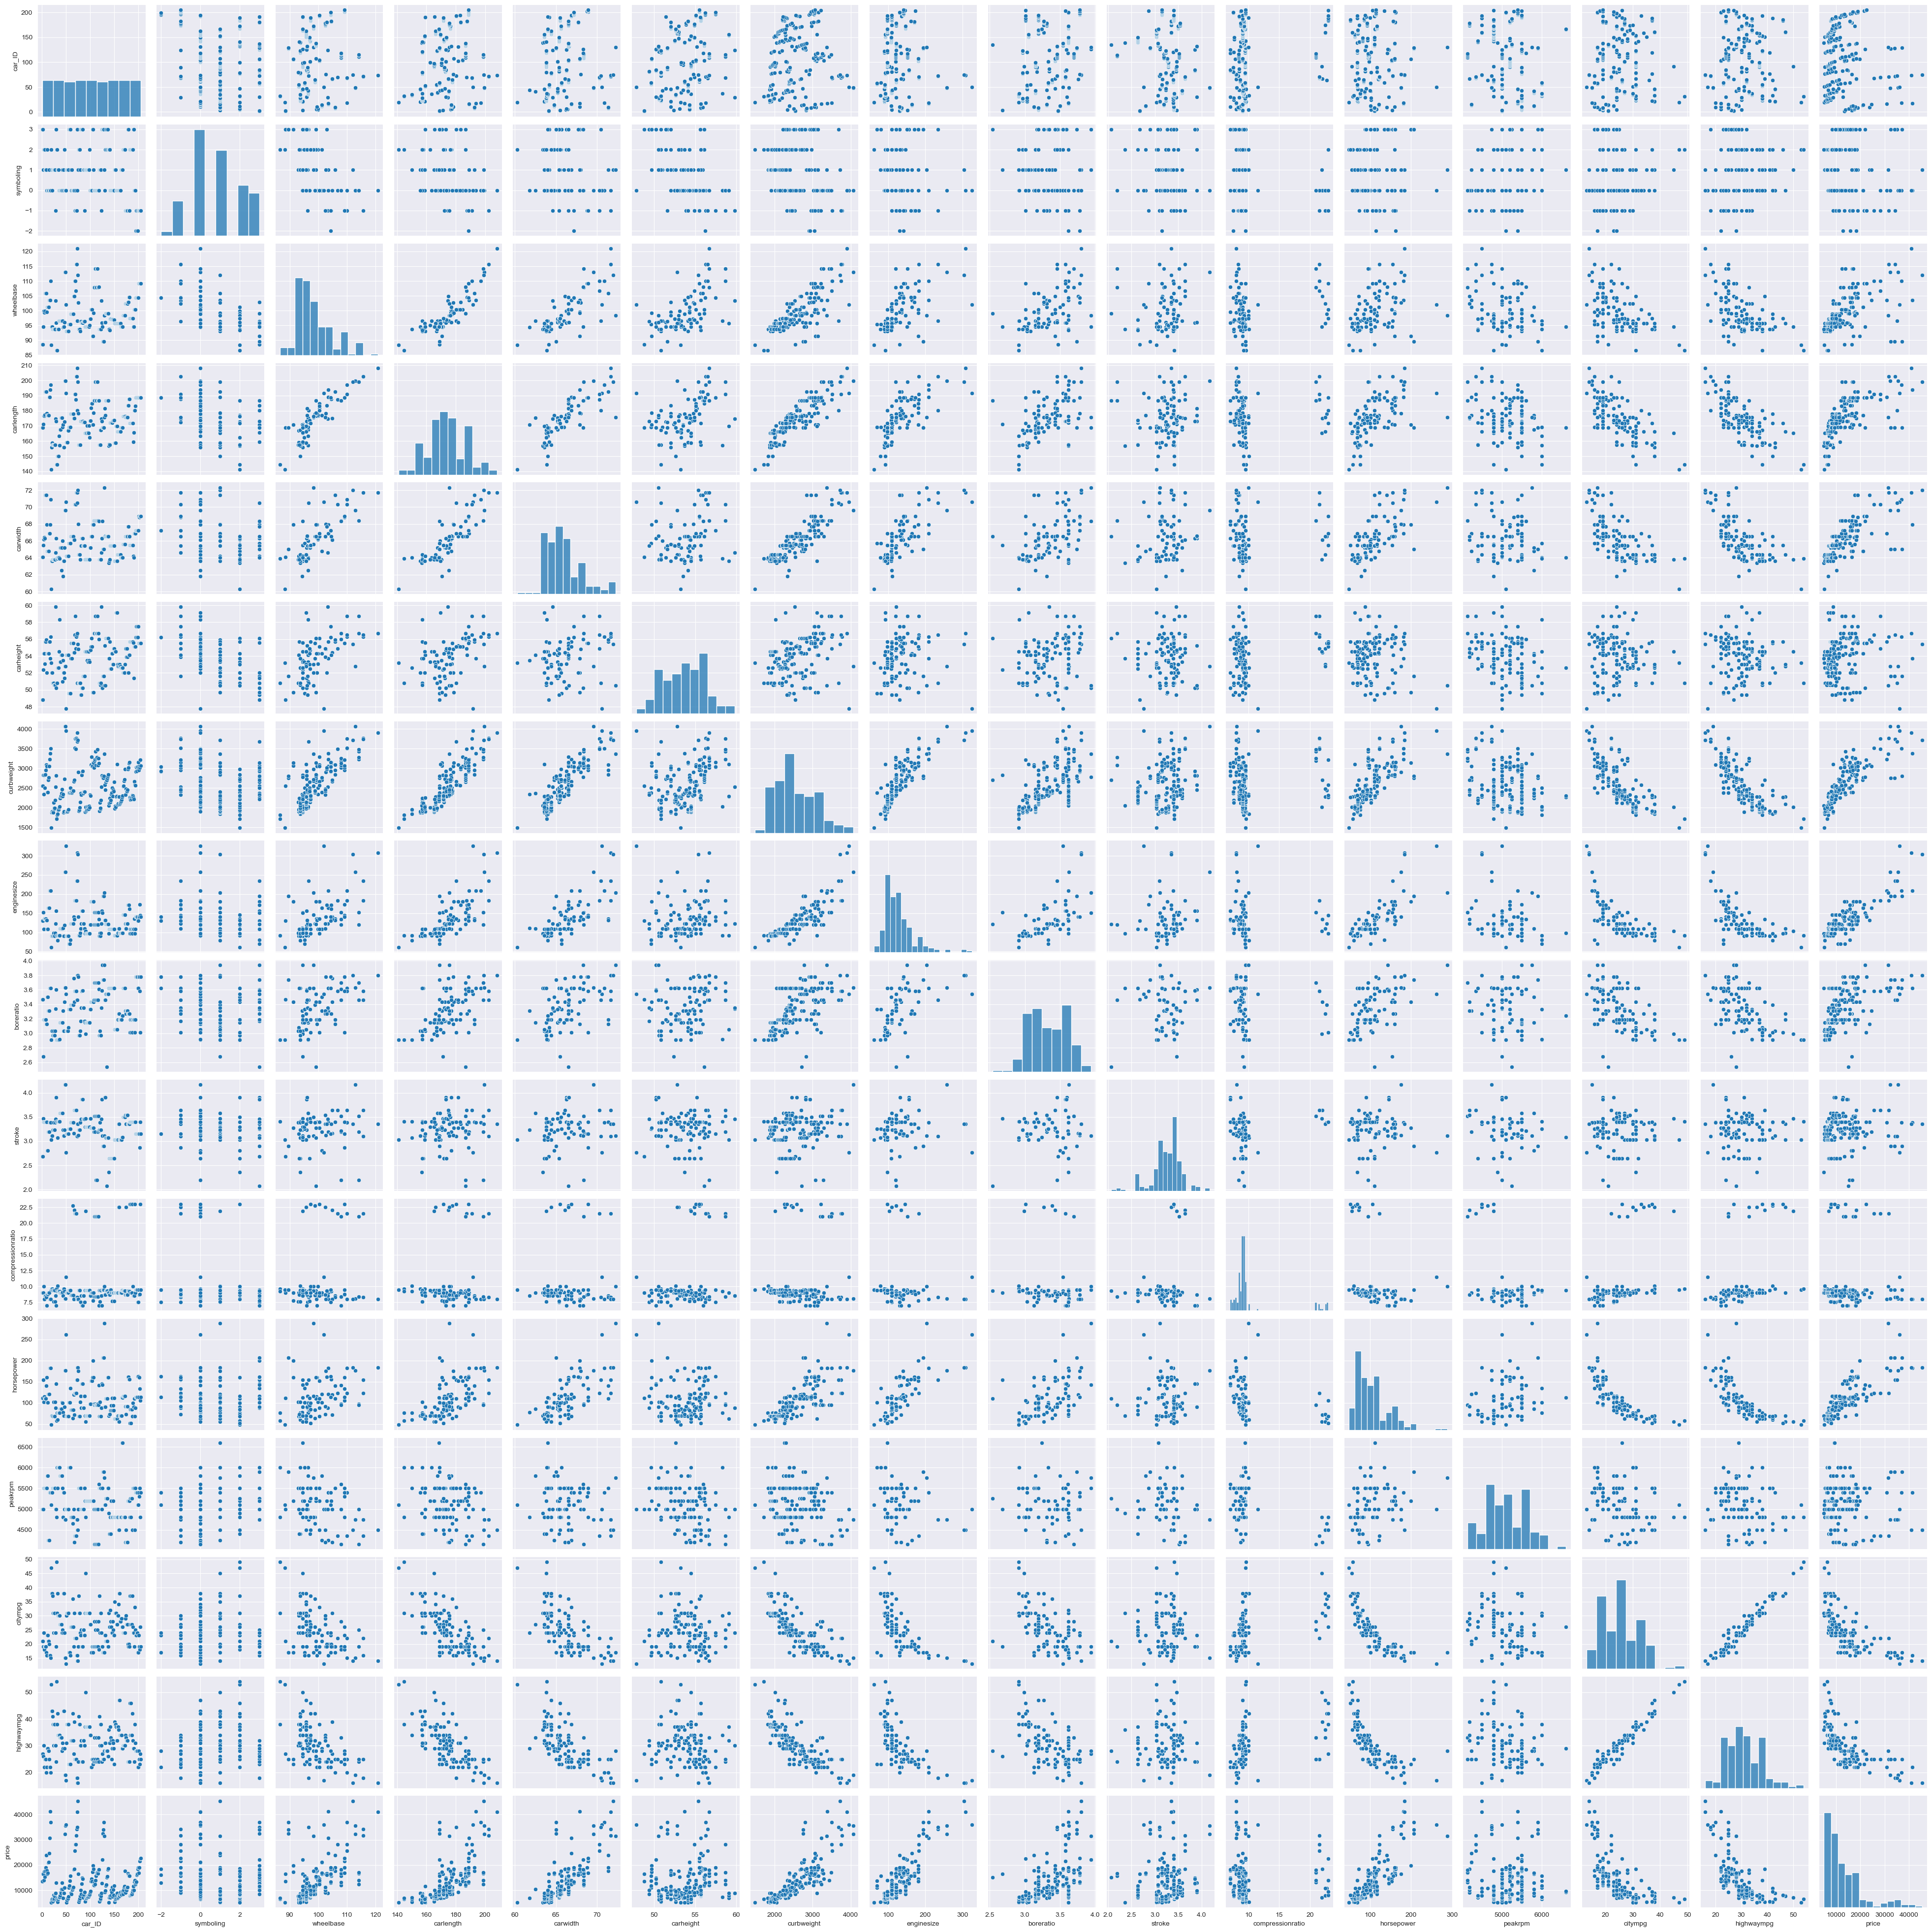

In [65]:
#pairplot()
sns.pairplot(data_EDA)

This is a pairplot of the entire data.This describes the entire data distribution in the form of a scatter plot and a distribution plot.  

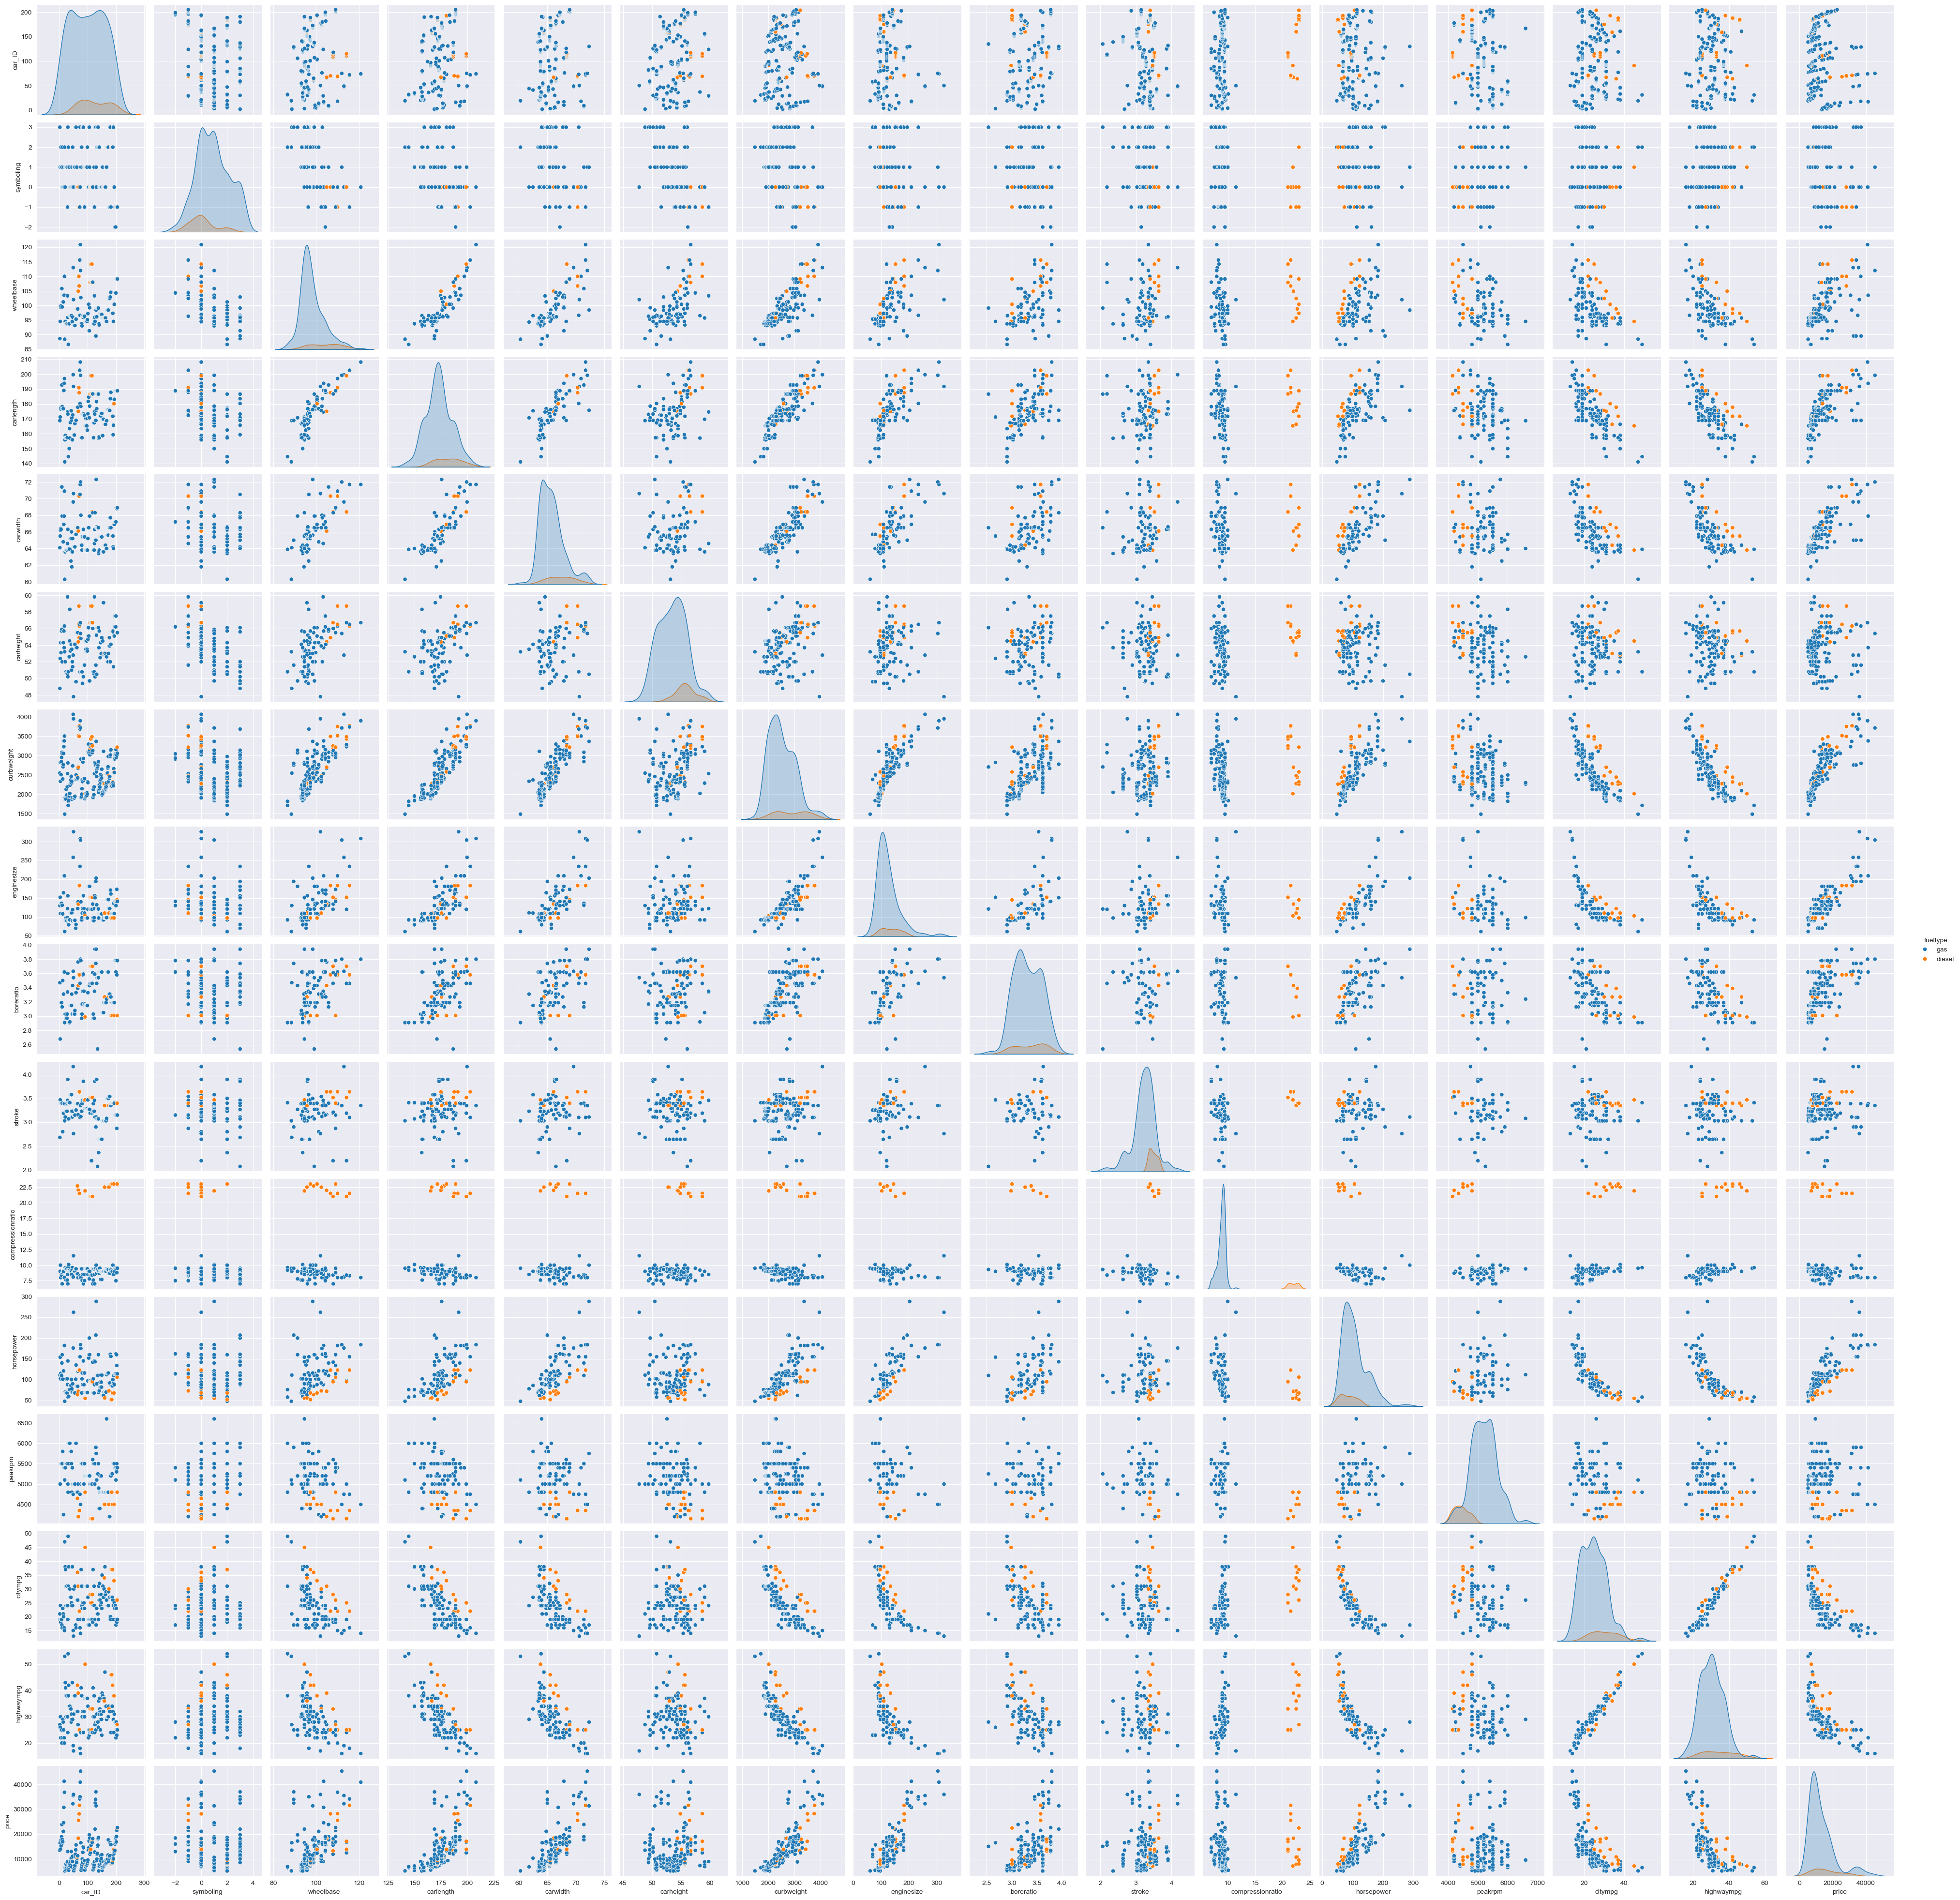

In [68]:
sns.pairplot(data_EDA,hue='fueltype')

The pair plot shows thst diesel cars have higher engine size and price,while gas cars are more frequent and widely distributed.
It also reveals positive correlations between features like horsepower and price,with clear seperation by fuel type.

# Data Preprocessing

In [281]:
#Cheking for Nan values 
data.isna().sum()


symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

our data dont have any Nan values if we have any Nan values we need to perform missing values imputation techniques.

## Basics statistics for data

In [285]:
data.describe()

symboling    fueltype  aspiration  doornumber     carbody  drivewheel  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146    0.902439    0.180488    0.439024    2.614634    1.326829   
std      1.245307    0.297446    0.385535    0.497483    0.859081    0.556171   
min     -2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000    0.000000    2.000000    1.000000   
50%      1.000000    1.000000    0.000000    0.000000    3.000000    1.000000   
75%      2.000000    1.000000    0.000000    1.000000    3.000000    2.000000   
max      3.000000    1.000000    1.000000    1.000000    4.000000    2.000000   

       enginelocation   wheelbase   carlength    carwidth  ...  enginesize  \
count      205.000000  205.000000  205.000000  205.000000  ...  205.000000   
mean         0.014634   98.756585  174.049268   65.907805  ...  126.907317   
std          0.120377    6.021776   12.337289    2.145204  ...   41.642693   
min          0.000000   86.600000  141.100000   60.300000  ...   61.000000   
25%          0.000000   94.500000  166.300000   64.100000  ...   97.000000   
50%          0.000000   97.000000  173.200000   65.500000  ...  120.000000   
75%          0.000000  102.400000  183.100000   66.900000  ...  141.000000   
max          1.000000  120.900000  208.100000   72.300000  ...  326.000000   

       fuelsystem   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean     3.253659    3.329756    3.255415         10.142537  104.117073   
std      2.013204    0.270844    0.313597          3.972040   39.544167   
min      0.000000    2.540000    2.070000          7.000000   48.000000   
25%      1.000000    3.150000    3.110000          8.600000   70.000000   
50%      5.000000    3.310000    3.290000          9.000000   95.000000   
75%      5.000000    3.580000    3.410000          9.400000  116.000000   
max      7.000000    3.940000    4.170000         23.000000  288.000000   

           peakrpm     citympg  highwaympg         price  
count   205.000000  205.000000  205.000000    205.000000  
mean   5125.121951   25.219512   30.751220  13276.710571  
std     476.985643    6.542142    6.886443   7988.852332  
min    4150.000000   13.000000   16.000000   5118.000000  
25%    4800.000000   19.000000   25.000000   7788.000000  
50%    5200.000000   24.000000   30.000000  10295.000000  
75%    5500.000000   30.000000   34.000000  16503.000000  
max    6600.000000   49.000000   54.000000  45400.000000  

[8 rows x 24 columns]

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [289]:
data.head()

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0               0       88.6      168.8      64.1  ...         130   
1               0       88.6      168.8      64.1  ...         130   
2               0       94.5      171.2      65.5  ...         152   
3               0       99.8      176.6      66.2  ...         109   
4               0       99.4      176.6      66.4  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0  

[5 rows x 24 columns]

## splitting the data in to independent and dependent variables in terms of x and y

In [292]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, [-1]]

## Feature scaling

In [295]:
from sklearn.preprocessing import MinMaxScaler
x_scl = MinMaxScaler()
y_scl = MinMaxScaler()

x = x_scl.fit_transform(x)
y = y_scl.fit_transform(y)

## splitting the data into training and testing 

In [298]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Model Building

In [301]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [303]:
#fitting data to model
reg.fit(x,y)

LinearRegression()

In [305]:
reg.score(x,y)

0.8802434927425343

In [307]:
#making predictions 
y_predict = reg.predict(x_test)

In [309]:
RMSE=root_mean_squared_error(y_pred=y_predict,y_true=y_test)
MAE = mean_absolute_error(y_pred=y_predict,y_true=y_test)
MSE = mean_squared_error(y_pred=y_predict,y_true=y_test)
print("root_mean_squared_error = ",RMSE)
print("mean_absolute_error =",MAE)
print("mean_squared_error =", MSE)

root_mean_squared_error =  0.08439691738088737
mean_absolute_error = 0.05592786451369215
mean_squared_error = 0.007122839663396327


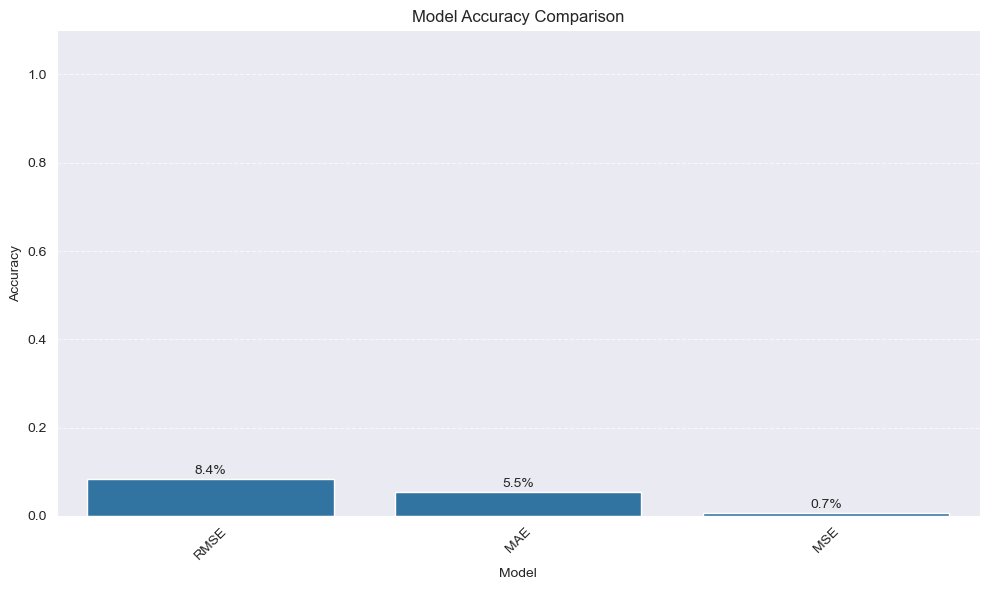

In [311]:
c={ 'Model':['RMSE','MAE','MSE'],
    'Accuracy':[0.084,0.055,0.007]}
df=pd.DataFrame(c)
plt.figure(figsize=(10,6))
barplot=sns.barplot(x='Model',y='Accuracy',data=df,)
for i, bar in enumerate(barplot.patches):
    height=bar.get_height()
    plt.text(
             bar.get_x()+bar.get_width()/2,
             height+0.01,
             f'{height*100:.1f}%',
             ha='center',
             fontsize=10
    )
    plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# polynomial regression

In [314]:
data=pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\CarPrice_Assignment.csv")
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [316]:
#convert cat into int
from sklearn.preprocessing import LabelEncoder
lab_obj = LabelEncoder()
data["fueltype"] = lab_obj.fit_transform(data["fueltype"])
data["aspiration"] = lab_obj.fit_transform(data["aspiration"])
data["doornumber"] = lab_obj.fit_transform(data["doornumber"])
data["carbody"] = lab_obj.fit_transform(data["carbody"])
data["drivewheel"] = lab_obj.fit_transform(data["drivewheel"])
data["enginelocation"] = lab_obj.fit_transform(data["enginelocation"])
data["enginetype"] = lab_obj.fit_transform(data["enginetype"])
data["cylindernumber"] = lab_obj.fit_transform(data["cylindernumber"])
data["fuelsystem"] = lab_obj.fit_transform(data["fuelsystem"])


#Drop unwanted columns 
data = data.drop("car_ID",axis=1)
data = data.drop("CarName",axis=1)

#Divide the features into independent and dependent variables in terms of X and Y
x = data.iloc[:, 0:-1]
y = data.iloc[:, [-1]]

In [318]:
#Feature Scaling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
x_scl = MinMaxScaler()
y_scl = MinMaxScaler()

x = x_scl.fit_transform(x)
y = y_scl.fit_transform(y)
# spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [320]:
# Create Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)



In [322]:
#Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [324]:
model.score(x, y)

0.9987378294273811

In [326]:
model.score(x_poly_test,y_test)

0.9995522925524235

In [328]:
y_pred = model.predict(x_poly_test)

In [330]:
RMSE = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test,y_pred=y_pred)
MSE = mean_squared_error(y_true=y_test,y_pred=y_pred)
print("root_mean_squared_error = ",RMSE)
print("mean_absolute_error =",MAE)
print("mean_squared_error =", MSE)

root_mean_squared_error =  0.004667085484121996
mean_absolute_error = 0.0018808763576210427
mean_squared_error = 2.1781686916102243e-05


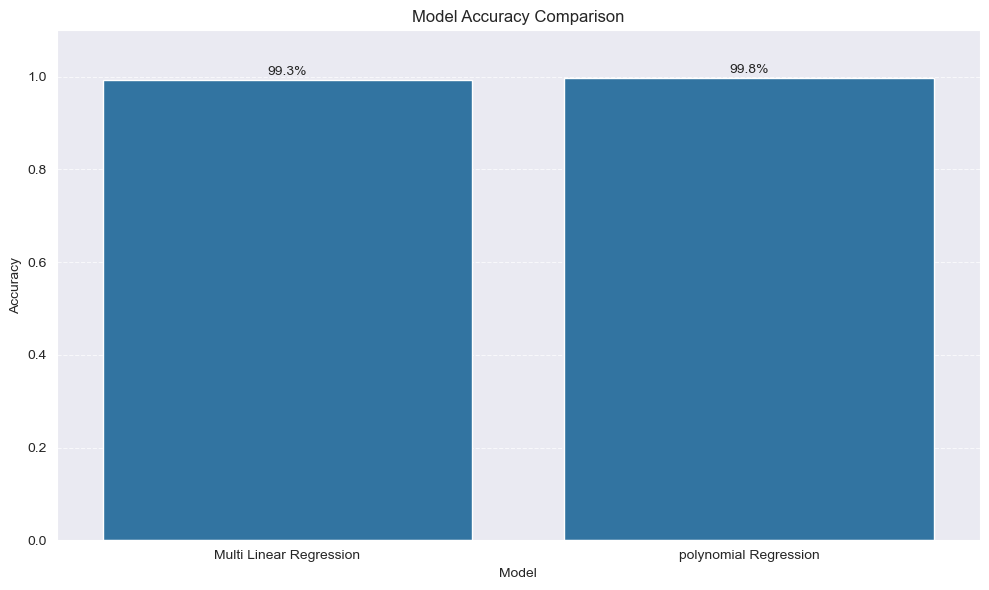

In [334]:
c={ 'Model':['Multi Linear Regression','polynomial Regression'],
    'Accuracy':[0.993,0.998]}
df=pd.DataFrame(c)
plt.figure(figsize=(10,6))
barplot=sns.barplot(x='Model',y='Accuracy',data=df,)
for i, bar in enumerate(barplot.patches):
    height=bar.get_height()
    plt.text(
             bar.get_x()+bar.get_width()/2,
             height+0.01,
             f'{height*100:.1f}%',
             ha='center',
             fontsize=10
    )
    plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()